In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

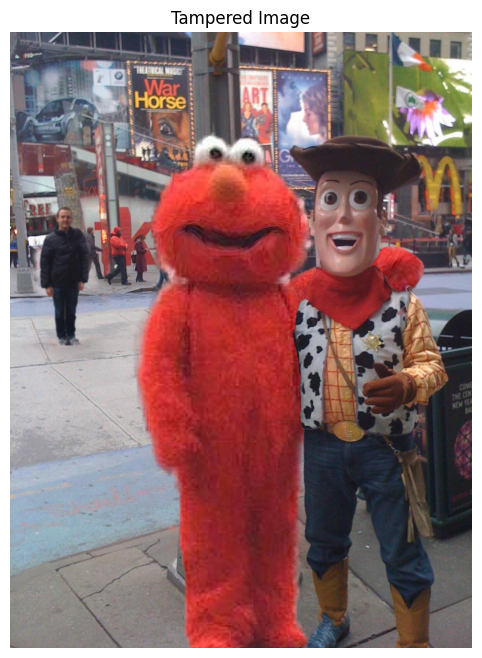

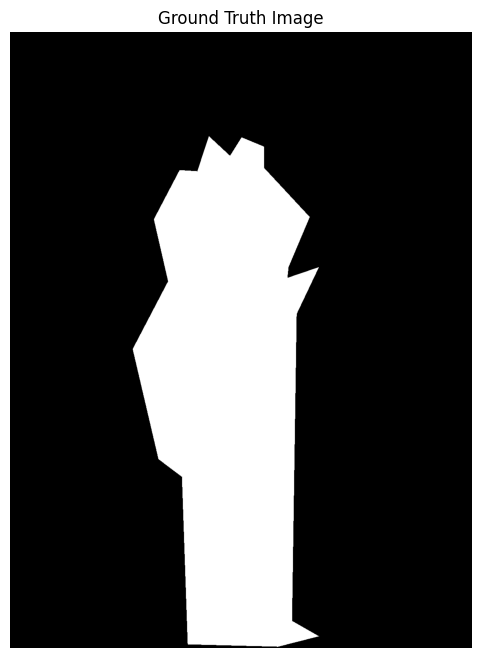

In [3]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "im1_edit3"

tp_img = cv2.imread(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = cv2.imread(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img, "Tampered Image")
plot_image(gt_img, "Ground Truth Image")

In [7]:
def recompress_image(image, quality):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    result, encimg = cv2.imencode('.jpg', image, encode_param)
    if not result:
        raise ValueError("Could not recompress the image.")
    recompressed_image = cv2.imdecode(encimg, 1)
    return recompressed_image


def get_image_difference(image1, image2):
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    diff = diff ** 2
    return diff


def scale_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

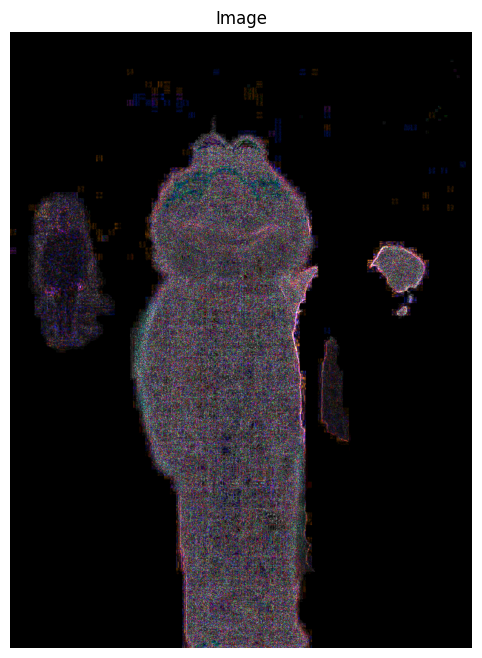

In [8]:
quality = 75
display_multiplier = 20
sc_width = 600
sc_height = 600

recompressed_image = recompress_image(tp_img, quality)
image_difference = get_image_difference(tp_img, recompressed_image)

ela_min = np.min(image_difference)
ela_max = np.max(image_difference)

int_difference = np.sqrt(image_difference) * display_multiplier
int_difference = np.clip(int_difference, 0, 255).astype(np.uint8)

plot_image(int_difference)